2. (3 puntos) Hacer una función que diseñe filtros notch ideales, de Gauss o de Butterworth.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [68]:
def imagen_dft(imagen):
    """Esta función solo sirve con imágenes BGR,
    aunque sean a escala de grises. Usa cv2.imread(imagen, 0)"""
    dft = cv2.dft(np.float32(imagen), flags = cv2.DFT_COMPLEX_OUTPUT) # Transformada de la imagen
    dft_shift = np.fft.fftshift(dft) # Centramos la transformada
    magnitud = cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) # Magnitud del espectro
    # Regresar a imagen int
    cota = 20 * np.log(magnitud)
    img_transf = 255 * cota / np.max(cota)
    img_transf = img_transf.astype(np.uint8)
    
    return img_transf

In [44]:
def kernel_ideal(M, N, centro, d0):
    u_k = centro[0]
    v_k = centro[1]
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(u, v)
    
    D_k = np.square(U - 0.5 * M - u_k) + np.square(V - 0.5 * N - v_k)
    D_mk = np.square(U - 0.5 * M + u_k) + np.square(V - 0.5 * N + v_k)
    H_k = np.where(D_k <= d0**2, 0, 1) # Primer pasaaltos
    H_mk = np.where(D_mk <= d0**2, 0, 1) # Segundo pasaaltos
    kernel = H_k * H_mk
    
    return kernel

In [45]:
def kernel_gaussiano(M, N, centro, d0):
    u_k = centro[0]
    v_k = centro[1]
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(u, v)
    
    D_k = np.square(U - 0.5 * M - u_k) + np.square(V - 0.5 * N - v_k)
    D_mk = np.square(U - 0.5 * M + u_k) + np.square(V - 0.5 * N + v_k)
    H_k = 1 - np.exp(-(0.5 / d0**2) * D_k) # Primer pasaaltos
    H_mk = 1 - np.exp(-(0.5 / d0**2) * D_mk) # Segundo pasaaltos
    kernel = H_k * H_mk
    
    return kernel

In [63]:
def kernel_butterworth(M, N, centro, d0, n):
    u_k = centro[0]
    v_k = centro[1]
    u = np.arange(M)
    v = np.arange(N)
    U, V = np.meshgrid(u, v)
    
    D_k = np.square(U - 0.5 * M - u_k) + np.square(V - 0.5 * N - v_k)
    D_mk = np.square(U - 0.5 * M + u_k) + np.square(V - 0.5 * N + v_k)
    H_k = np.divide(D_k**n, D_k**n + d0**(2*n)) # Primer pasaaltos
    H_mk = np.divide(D_mk**n, D_mk**n + d0**(2*n)) # Segundo pasaaltos
    kernel = H_k * H_mk
    
    return kernel

In [74]:
def filtrar_notch(img, d0, centro = (0, 0), tipo = 0, pasa = 0, n = 0.0):
    """Filtro notch. 
    tipo = 0 para ideal, 1 para gaussiano y cualquier otro valor para butterworth.
    pasa = 0 para notchreject, 1 para notchpass.
    centro y radio son los del notch. notch simétrico automático.
    Especificar n solo para butterworth"""
    
    M, N = img.shape
    
    if tipo == 0:
        kernel_prov = kernel_ideal(M, N, centro, d0)
    elif tipo == 1:
        kernel_prov = kernel_gaussiano(M, N, centro, d0)
    else:
        kernel_prov = kernel_butterworth(M, N, centro, d0, n)
        
    kernel = pasa + (-1)**pasa * kernel_prov
    transformada = np.fft.fftshift(np.fft.fft2(img))
    aplico_filtro = kernel * transformada
    img_filtrada = np.real(np.fft.ifft2(np.fft.ifftshift(aplico_filtro)))
    
    return img_filtrada

In [71]:
img = cv2.imread('imagenes/FigP0405(HeadCT_corrupted).tif', 0)
img_dft = imagen_dft(img)

Text(0.5, 1.0, 'Transformada de la imagen')

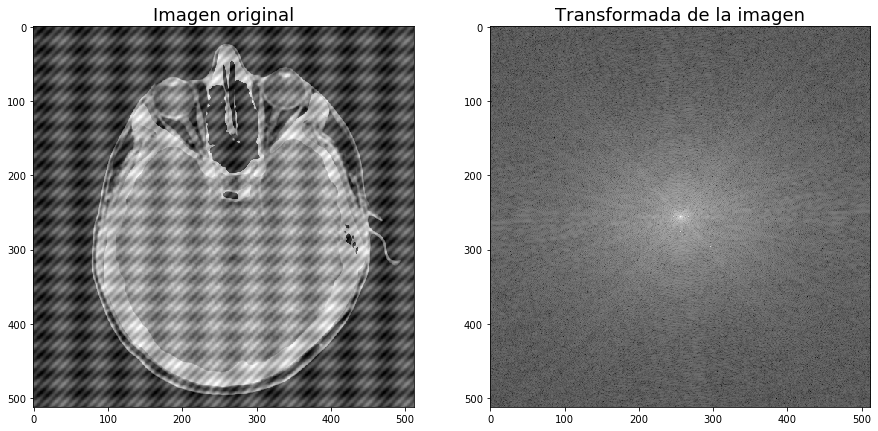

In [72]:
fig = plt.figure(figsize = (15, 10))
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap = 'gray')
plt.title('Imagen original', size = 18)
fig.add_subplot(1, 2, 2)
plt.imshow(img_dft, cmap = 'gray')
plt.title('Transformada de la imagen', size = 18)

In [75]:
img_filtrada = filtrar_notch(img, 5, (0, 20))

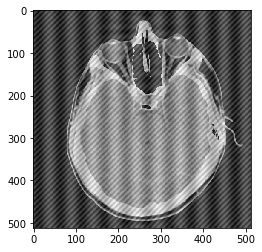

In [76]:
plt.imshow(img_filtrada, cmap = 'gray')